In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
drugbank_input = Chem.SDMolSupplier('../data/drugbank.sdf')
drugbank = [m for m in drugbank_input if m]

# Scaffold analysis
scaffolds are, roughly speaking, the "backbone" of a chemical structure: usually a central substructure describing in various details the rings and links between them. They come in many variants, here are some:

![scaffold type examples](img/scaffold_variants_schneider.gif) (http://pubs.rsc.org/en/content/articlehtml/2008/np/b715668p)

They are often used as a metric for chemical diversity of a set of molecules, or to define a particular group of structures. I bet some of these will look familiar to you:

![famous scaffolds examples](img/famous_scaffolds.jpg) (Murcko presentation)

Nice little presentation:
https://www.slideshare.net/jeremyjyang/molecular-scaffolds-talk

The presentation shows some scaffold analysis tools with nice clicky graphical interface. But we will do it the 'fun' way: let's make some scaffolds in RDKit:

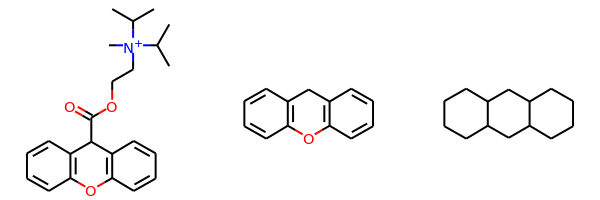

In [2]:
from rdkit.Chem.Scaffolds import MurckoScaffold
# scaffolding our favorite satanic structure:
basic_structure = drugbank[666]
atomic_scaffold = MurckoScaffold.GetScaffoldForMol(basic_structure)
graph_scaffold = MurckoScaffold.MakeScaffoldGeneric(atomic_scaffold)
Draw.MolsToGridImage((basic_structure, atomic_scaffold, graph_scaffold))

In [3]:
# let's scaffold entire DrugBank:
def make_atomic_scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    atomic_scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    try:
        Chem.SanitizeMol(atomic_scaffold)
    except ValueError:
        return None
    return atomic_scaffold
    
drugbank_atomic_scaffolds = [make_atomic_scaffold(mol) for mol in drugbank]
len(drugbank_atomic_scaffolds), len([x for x in drugbank_atomic_scaffolds if x])

(7110, 7108)

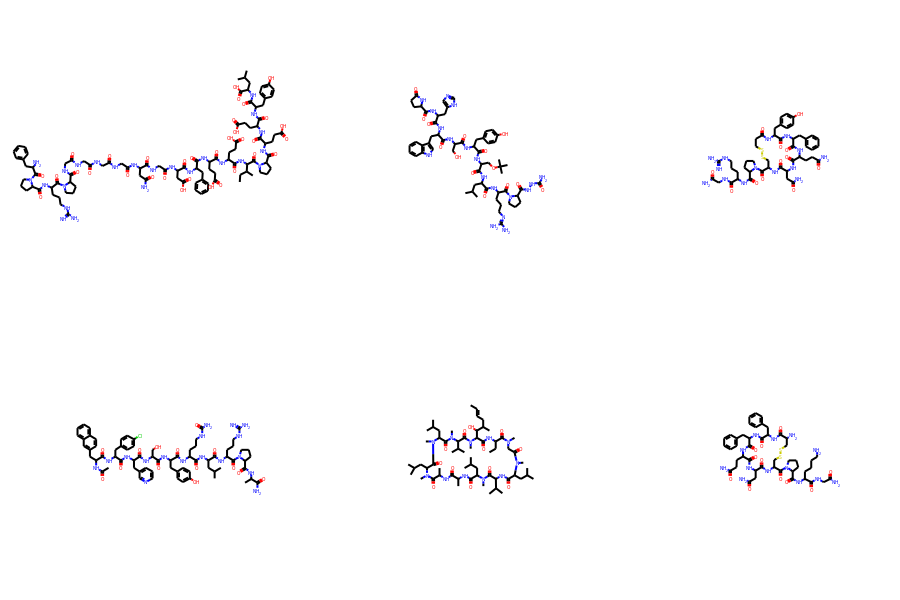

In [14]:
Draw.MolsToGridImage(drugbank[:6], subImgSize=(300, 300))

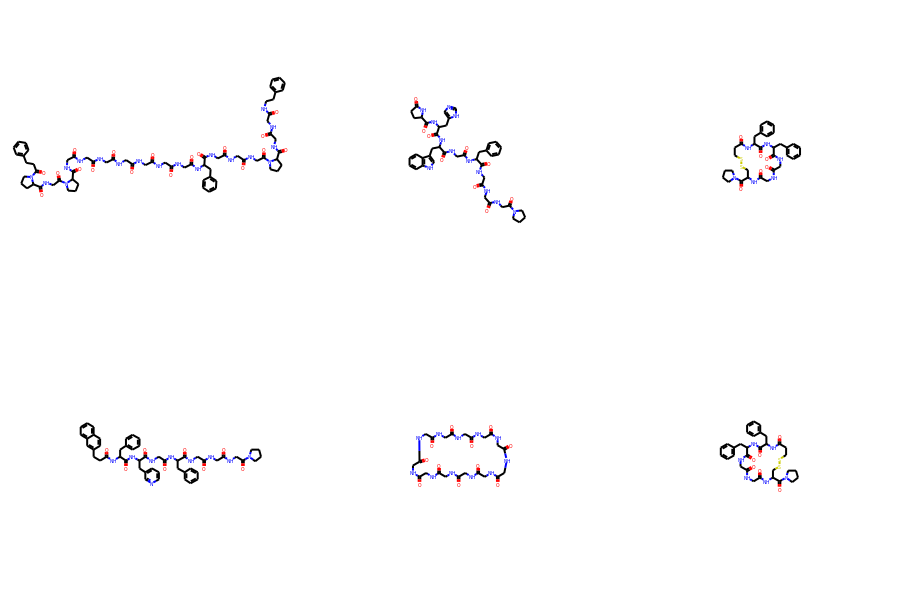

In [12]:
Draw.MolsToGridImage(drugbank_atomic_scaffolds[:6], subImgSize=(300, 300))

In [8]:
def make_graph_scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol)
    atomic_scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    try:
        Chem.SanitizeMol(atomic_scaffold)
        graph_scaffold = MurckoScaffold.MakeScaffoldGeneric(atomic_scaffold)
    except ValueError:
        return None
    return graph_scaffold

In [10]:
drugbank_graph_scaffolds = [make_graph_scaffold(mol) for mol in drugbank]
len(drugbank_graph_scaffolds), len([x for x in drugbank_graph_scaffolds if x])

(7110, 7104)

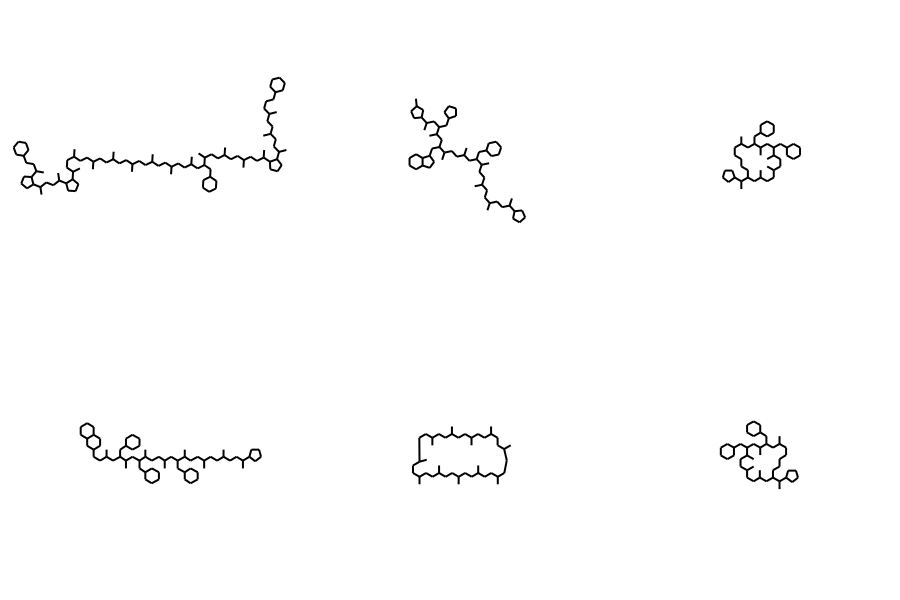

In [13]:
Draw.MolsToGridImage(drugbank_graph_scaffolds[:6], subImgSize=(300, 300))

## Scaffold data aggregation

In [17]:
def smiles_counts(smiles):
    countdict = {}
    for s in smiles:
        countdict[s] = countdict.get(s, 0) + 1
    return sorted(list(countdict.items()), key=lambda x: x[1], reverse=True)

In [19]:
drugbank_aggregated_atomic_scaffolds = smiles_counts((Chem.MolToSmiles(s) for s in drugbank_atomic_scaffolds if s))

In [20]:
drugbank_aggregated_atomic_scaffolds

[('', 982),
 ('c1ccccc1', 637),
 ('C1CCOCC1', 131),
 ('c1ncc2ncn(C3CCCO3)c2n1', 101),
 ('c1ccc2ccccc2c1', 49),
 ('c1ccc2[nH]ccc2c1', 47),
 ('c1ccncc1', 46),
 ('O=c1ccn(C2CCCO2)c(=O)[nH]1', 46),
 ('C1CCCCC1', 46),
 ('c1ccc(-c2ccccc2)cc1', 44),
 ('c1ccc(Cc2ccccc2)cc1', 30),
 ('O=C1C=C2CCC3C4CCCC4CCC3C2CC1', 29),
 ('O=C1C=CC2C(=C1)CCC1C3CCCC3CCC21', 26),
 ('O=c1ncccn1C1CCCO1', 24),
 ('C1=CCCCC1', 23),
 ('C1CCNC1', 22),
 ('C1CCOC1', 22),
 ('O=c1cc[nH]c(=O)[nH]1', 21),
 ('O=c1[nH]cnc2c1ncn2C1CCCO1', 20),
 ('c1ccc(Oc2ccccc2)cc1', 19),
 ('c1c[nH]cn1', 17),
 ('O=C(NCc1ccccc1)c1ccccc1', 17),
 ('O=c1ccn(C2CCC(CO[PH](=O)O[PH](=O)OC3CCCCO3)O2)c(=O)[nH]1', 16),
 ('O=C1CN=C(c2ccccc2)c2ccccc2N1', 15),
 ('c1ccc(Nc2ccccc2)cc1', 15),
 ('C1CCC(OC2CCCOC2)OC1', 15),
 ('c1ccc2c(c1)CCC1C2CCC2CCCC21', 15),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 15),
 ('c1ccc2ncccc2c1', 14),
 ('c1ccc(CCN2CCC(Nc3ccccc3)CC2)cc1', 14),
 ('O=C(c1ccccc1)c1ccccc1', 13),
 ('C1CCNCC1', 13),
 ('c1cscn1', 13),
 ('c1ccc(COc2ccccc2)cc1', 12),
 

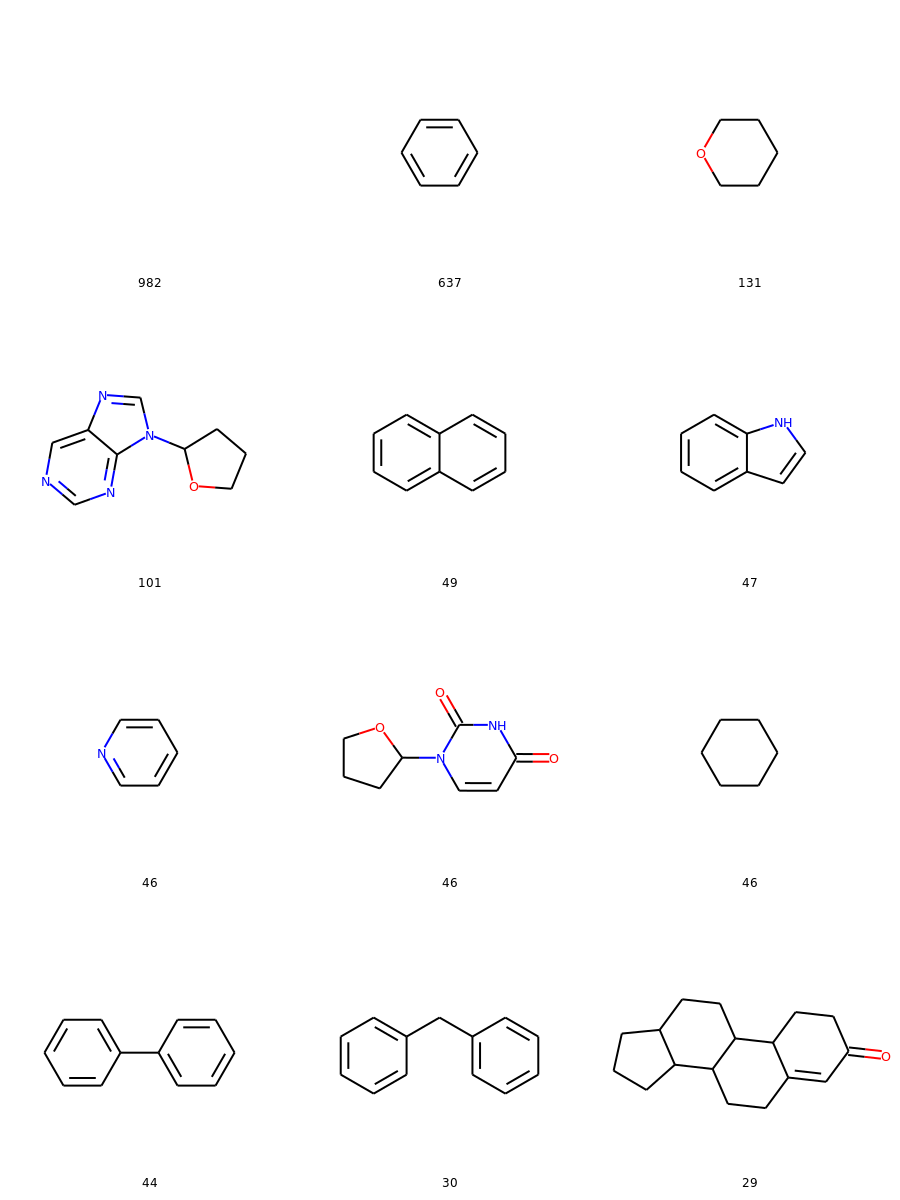

In [26]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in drugbank_aggregated_atomic_scaffolds[:12]],
                     legends=[str(count) for scaffold, count in drugbank_aggregated_atomic_scaffolds[:12]],
                     subImgSize=(300, 300))

In [28]:
drugbank_aggregated_graph_scaffolds = smiles_counts((Chem.MolToSmiles(s) for s in drugbank_graph_scaffolds if s))
drugbank_aggregated_graph_scaffolds

[('', 982),
 ('C1CCCCC1', 958),
 ('C1CCC(CC2CCCCC2)CC1', 142),
 ('C1CCCC1', 138),
 ('C1CCC2CCCC2C1', 132),
 ('C1CCC2C(C1)CCC2C1CCCC1', 130),
 ('C1CCC2CCCCC2C1', 102),
 ('C1CCC(C2CCCCC2)CC1', 85),
 ('CC1CCC2C(CCC3C4CCCC4CCC23)C1', 77),
 ('C1CCC(C2CCCC2)CC1', 60),
 ('C1CCC(CCC2CCCCC2)CC1', 60),
 ('CC1CCC(C2CCCC2)C(C)C1', 54),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 46),
 ('CC1CCCC1', 40),
 ('C1CCC(CC2CCCC2)CC1', 39),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 36),
 ('CC1CCCCC1C1CCCC1', 31),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 31),
 ('CC1CCCC2C1CCC2C1CCCC1', 31),
 ('C1CCC2CC3CCCCC3CC2C1', 30),
 ('CC(CCC1CCCCC1)C1CCCCC1', 30),
 ('C1CCC(C2CCC3CCCCC32)CC1', 29),
 ('CC1CCCCC1', 29),
 ('CC1CCCC(C)C1', 28),
 ('CC1CCCC2CCCCC12', 24),
 ('CC(CC1CCCCC1)C1CCCCC1', 22),
 ('CC1CCC2CCCCC2C1', 22),
 ('C1CCC(CC2CCCC3CCCCC32)CC1', 21),
 ('CC(C1CCCCC1)C1CCCCC1', 20),
 ('CC(C)(CC1CCCCC1)C1CCCCC1', 19),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 19),
 ('CC(CCCC1CCCCC1)C1CCCCC1', 18),
 ('CC(CCC1CCC(C2CCCCC2)C1)CC(C)CCC1CCC(C2CCC3CCCCC32)C1'

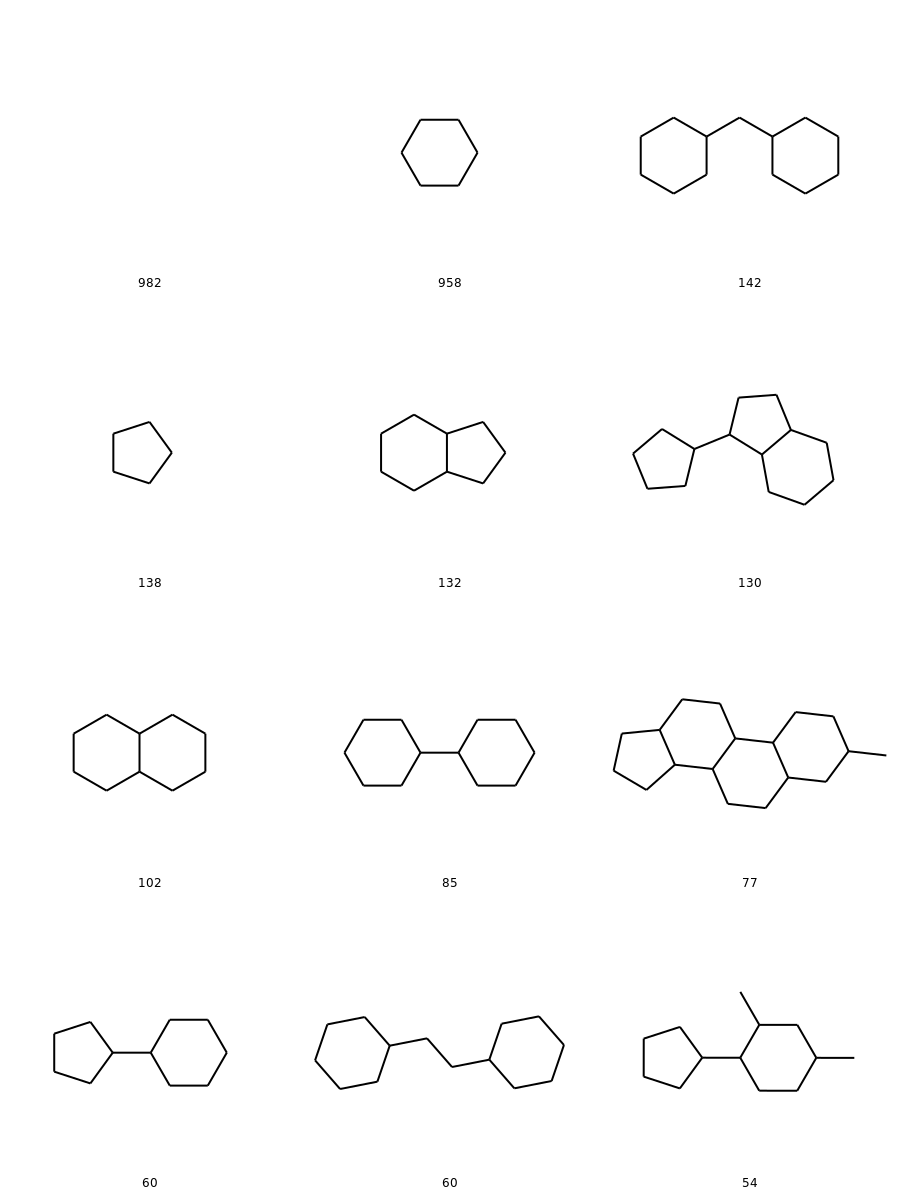

In [29]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in drugbank_aggregated_graph_scaffolds[:12]],
                     legends=[str(count) for scaffold, count in drugbank_aggregated_graph_scaffolds[:12]],
                     subImgSize=(300, 300))